# K nearest neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x, y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h: X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

# Breast cancer dataset

## Read data

### Question 1
Read the data given in bc2.csv file

In [48]:
import pandas as pd
import seaborn as sns

In [12]:
A=pd.read_csv('bc2.csv')
A

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


## Data preprocessing

### Question 2
Observe the no.of records in dataset and type of each column

In [13]:
A.shape

(699, 11)

### Question 3
Use summary statistics to check if missing values, outlier and encoding treament is necessary

Hint: use **describe()**

In [22]:
A.describe()


,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


#### Check Missing Values

In [15]:
A.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

### Question 4
#### Check how many `?` are there in Bare Nuclei feature (they are also unknown or missing values). 

In [16]:
A['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

#### Replace them with the 'top' value of the describe function of Bare Nuclei feature

Hint: give value of parameter include='all' in describe function

In [23]:
A.describe(include='all')

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


In [29]:
A['Bare Nuclei']=A['Bare Nuclei'].str.replace('?','1')
A['Bare Nuclei'].value_counts()

1     418
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

### Question 5
#### Find the distribution of target variable (Class) 

In [38]:
A['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

#### Plot the distribution of target variable using histogram

(array([458.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 241.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <a list of 10 Patch objects>)

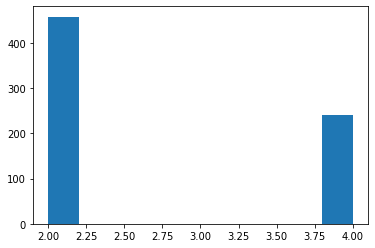

In [37]:
import matplotlib.pyplot as plt
plt.hist(A['Class'])

#### Convert the datatype of Bare Nuclei to `int`

In [47]:
A['Bare Nuclei']=A['Bare Nuclei'].astype(int)
A.dtypes

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int32
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

## Scatter plot

### Question 6
Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

In [54]:
A.corr()


,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.034901,-0.080226
ClumpThickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,-0.092533,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170


In [59]:
A.drop('Cell Size',axis=1, inplace=True)
A

,ID,ClumpThickness,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,2,1,3,1,1,2
1,1002945,5,4,5,7,10,3,2,1,2
2,1015425,3,1,1,2,2,3,1,1,2
3,1016277,6,8,1,3,4,3,7,1,2
4,1017023,4,1,3,2,1,3,1,1,2
5,1017122,8,10,8,7,10,9,7,1,4
6,1018099,1,1,1,2,10,3,1,1,2
7,1018561,2,2,1,2,1,3,1,1,2
8,1033078,2,1,1,2,1,1,1,5,2
9,1033078,4,1,1,2,1,2,1,1,2


## Train test split

### Question 7
#### Divide the dataset into feature set and target set

In [64]:
fs=A.drop(columns="Class")
ts=A["Class"]
fs


,ID,ClumpThickness,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,1000025,5,1,1,2,1,3,1,1
1,1002945,5,4,5,7,10,3,2,1
2,1015425,3,1,1,2,2,3,1,1
3,1016277,6,8,1,3,4,3,7,1
4,1017023,4,1,3,2,1,3,1,1
5,1017122,8,10,8,7,10,9,7,1
6,1018099,1,1,1,2,10,3,1,1
7,1018561,2,2,1,2,1,3,1,1
8,1033078,2,1,1,2,1,1,1,5
9,1033078,4,1,1,2,1,2,1,1


In [65]:
ts


0      2
1      2
2      2
3      2
4      2
5      4
6      2
7      2
8      2
9      2
10     2
11     2
12     4
13     2
14     4
15     4
16     2
17     2
18     4
19     2
20     4
21     4
22     2
23     4
24     2
25     4
26     2
27     2
28     2
29     2
      ..
669    4
670    4
671    2
672    2
673    2
674    2
675    2
676    2
677    2
678    2
679    2
680    4
681    4
682    2
683    2
684    2
685    2
686    2
687    2
688    2
689    2
690    2
691    4
692    2
693    2
694    2
695    2
696    4
697    4
698    4
Name: Class, Length: 699, dtype: int64

#### Divide the Training and Test sets in 70:30 

In [66]:
from sklearn.model_selection import train_test_split


In [68]:
X_train,X_test,Y_train,Y_test=train_test_split(fs,ts,test_size=0.3,random_state=42)

,ID,ClumpThickness,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
357,859350,8,10,7,10,10,7,3,8
648,1315807,5,10,10,10,2,10,10,10
291,561477,1,1,1,2,1,3,1,1
420,1255384,3,2,3,2,3,3,1,1
177,1201936,5,10,3,8,1,5,10,3
456,1257470,10,5,8,5,10,8,6,1
444,780555,5,1,6,3,1,2,1,1
83,1147044,3,1,1,2,2,7,1,1
453,1230994,4,5,8,6,10,10,7,1
354,855524,1,1,1,2,1,2,1,1


## Scale the data

### Question 8
Standardize the data

Hint: use **StandardScaler()**

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)


StandardScaler(copy=True, with_mean=True, with_std=True)

## Build Model

### Question 9

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [81]:
NNH = KNeighborsClassifier(n_neighbors= 9, weights = 'uniform', metric='euclidean')
NNH.fit(X_train, Y_train)
y_train_pred = NNH.predict(X_train)
y_test_pred = NNH.predict(X_test)
predicted_labels = pd.DataFrame(NNH.predict(X_test))
accuracy_score_train = accuracy_score(Y_train, y_train_pred)
accuracy_score_test = accuracy_score(Y_test, y_test_pred)
print("train accuracy is ", accuracy_score_train)
print("test accuracy is ", accuracy_score_test)

train accuracy is  0.7116564417177914
test accuracy is  0.6761904761904762


In [86]:
k_range = range(3,11,2)
scores={}
# scores=[]
for k in k_range:
    nnh = KNeighborsClassifier(n_neighbors=k, weights = 'uniform', metric='euclidean')
    nnh.fit(X_train, Y_train)
    y_pred = nnh.predict(X_train)
    scores[k]=(accuracy_score(Y_train, y_pred))
#     scores.append(accuracy_score(y_test, y_pred))
k_range

range(3, 11, 2)

## Find optimal value of K

### Question 10
Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [90]:
k_range = range(1,20,2)
scores={}
# scores=[]
for k in k_range:
    nnh = KNeighborsClassifier(n_neighbors=k, weights = 'uniform', metric='euclidean')
    nnh.fit(X_train, Y_train)
    y_pred = nnh.predict(X_train)
    scores[k]=(accuracy_score(Y_train, y_pred))
#     scores.append(accuracy_score(y_test, y_pred))
scores

{1: 1.0,
 3: 0.7893660531697342,
 5: 0.721881390593047,
 7: 0.721881390593047,
 9: 0.7116564417177914,
 11: 0.6850715746421268,
 13: 0.6912065439672802,
 15: 0.6748466257668712,
 17: 0.6768916155419223,
 19: 0.6605316973415133}

## Plot accuracy

### Question 11

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

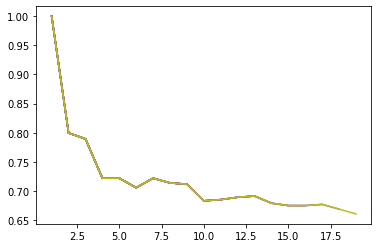

In [96]:
import matplotlib.pyplot as pltp
k_range = range(1,20)
x_axis=[]
y_axis=[]
scores={}
# scores=[]
for k in k_range:
    nnh = KNeighborsClassifier(n_neighbors=k, weights = 'uniform', metric='euclidean')
    nnh.fit(X_train, Y_train)
    y_pred = nnh.predict(X_train)
    x_axis.append(k)
    y_axis.append(accuracy_score(Y_train,y_pred))
    plt.plot(x_axis,y_axis)
